In [1]:
import numpy as np
import EI_subspace_RNN
import scipy.stats as stats
import utils

# hyperparameters
N_e = 8
N_i = 8
N = N_e + N_i 
K = 3
J = np.random.normal(0, 1/N, (K,N))
J_inv = np.linalg.pinv(J) # pseudo-inverse (J * J_inv = identity, but J_inv * J is not)
sparsity = 0.25
D = 8
T = 1000
print(J.shape)

(3, 16)


In [2]:
RNN = EI_subspace_RNN.EI_subspace_RNN(N_e, N_i, sparsity, J, seed1=2, seed2=4)
N_weights = len(RNN.W_ind)
print(RNN.W_ind)

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10], [11, 11], [12, 12], [13, 13], [14, 14], [15, 15], [13, 11], [4, 15], [1, 14], [4, 8], [6, 15], [13, 15], [7, 15], [5, 7], [13, 4], [11, 6], [15, 10], [3, 12], [14, 9], [0, 2], [8, 10], [4, 13], [10, 8], [4, 5], [8, 14], [4, 0], [2, 7], [11, 14], [10, 2], [10, 12], [3, 14], [10, 5], [14, 11], [13, 9], [10, 14], [6, 9], [6, 2], [0, 7], [2, 9], [5, 4], [5, 11], [9, 6], [8, 15], [11, 3], [14, 10], [14, 1], [12, 2], [15, 8], [14, 7], [3, 13], [7, 8], [9, 5], [11, 15], [1, 5]]


In [3]:
w = np.ones((N_weights))
print(w.shape)
print(RNN.build_full_weight_matrix(w))

(64,)
[[ 1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0. -1.  0.  0. -1. -1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0. -1.  0. -1.  0. -1.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0. -1. -1. -1.  0.  0

In [13]:
true_w, true_b, true_s, true_mu0, true_Q0, true_C_, true_d, true_R = RNN.generate_parameters(N_weights, D, K)
x, y = RNN.generate_activity(T, true_w, true_b, true_s, true_mu0, true_Q0, true_C_, true_d, true_R )
print(x.shape)
print(y.shape)

(1000, 3, 1)
(1000, 8, 1)


In [14]:
W = RNN.build_full_weight_matrix(w)
A = utils.build_dynamics_matrix_A(W, J)

In [32]:
w, b, s, mu0, Q0, C_, d, R = RNN.fit_EM(x, y, true_w, true_b, true_s, true_mu0, true_Q0, true_C_, true_d, true_R, alpha=0, beta=0, max_iter=1)

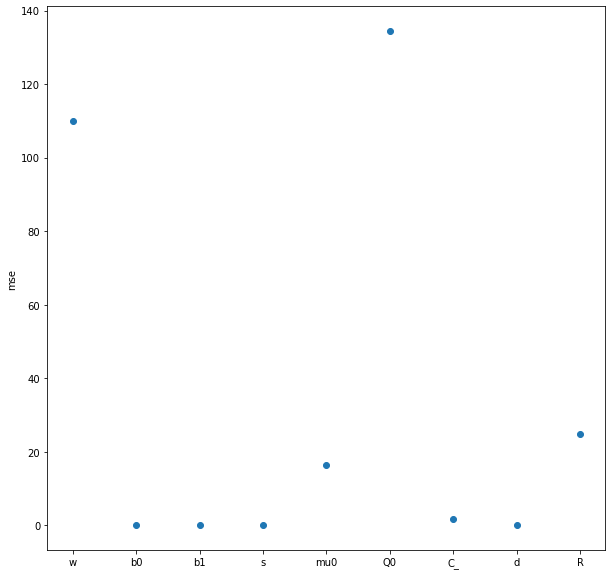

In [33]:
import matplotlib.pyplot as plt
def mse(z, true_z):
    return np.trace((z-true_z) @ (z-true_z).T)
def plot_mse(w, b, s, mu0, Q0, C_, d, R, true_w, true_b, true_s, true_mu0, true_Q0, true_C_, true_d, true_R):
    fig, axes = plt.subplots(figsize=(10,10))
    axes.set_ylabel('mse')
    axes.scatter(range(9), [mse(w, true_w), mse(b[0], true_b[0]), mse(b[1], true_b[1]), (s - true_s) ** 2, mse(mu0, true_mu0), mse(Q0, true_Q0), mse(C_, true_C_), mse(d, true_d), mse(R, true_R)] )
    axes.set_xticks(range(9), ['w', 'b0', 'b1','s', 'mu0', 'Q0', 'C_', 'd', 'R'])
    plt.show()
plot_mse(w, b, s, mu0, Q0, C_, d, R, true_w, true_b, true_s, true_mu0, true_Q0, true_C_, true_d, true_R)


In [21]:
from scipy.optimize import minimize
w, b, s, mu0, Q0, C_, d, R = RNN.generate_parameters(N_weights, D, K)
def constraint(w):
    return w
con = {'type': 'ineq', 'fun': constraint}
bounds = [(1, None) for i in range(w.shape[0])]
opt_fun = lambda w: np.trace(RNN.build_full_weight_matrix(w) @ RNN.build_full_weight_matrix(w).T)
opt_grad = lambda w: 2 * RNN.build_full_weight_matrix(w)
w = minimize(opt_fun, w.flatten(), method='SLSQP', constraints=[con], bounds=bounds).x
print(w)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
print(w.shape)
print(W.shape)

(64,)
(16, 16)
